<font color='darkgreen'><font size=8><u>Multiple Linear Regression</u></font></font>
# <font color='Navy'><u>Problem Statement:<u></font>
A US bike-sharing provider <b>BoomBikes</b> hired us to build a multiple linear regression model for the prediction of demand for shared bikes. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

<b>We want to know/do:</b>
   - Which features are significant in predicting the demand for shared bikes.
   - How well those features describe the bike demands
   - Making predictions off of these features
    
# <font color='Navy'><u>Exploratory Data Analysis<u></font>

In [1]:
#importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data csv and converting it into a dataframe
df=pd.read_csv('day.csv')

#quick peek into the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no nulls in any column

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Reading the data dictionary, we see that <font color='red'><b>instant</b></font> is basically the id of a row. But dataframes themselves have default 0-indexing for rows. So we can drop <font color='red'><b>instant</b></font>. There's another feature called <font color='red'><b>dteday</b></font> which is basically date and we cannot directly feed in datetype or string feature in a regression model. Also the two key aspects such as month and year are separately captured in two other features. Hence we can drop <font color='red'><b>dteday</b></font>. Of course we'll drop few more variables after further analysis.

In [5]:
df.drop(['instant','dteday'],axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# <font color='Navy'><u>Target Variable<u></font>

In the problem statement as well as the data dictionary it is stated that <font color='darkgreen' size=4><b>cnt<b></font> is the target variable. Also it is given that the variables <font color='blue'><b>casual<b></font> & <font color='blue'><b>registered<b></font> add up to <font color='darkgreen'><b>cnt<b></font>, this will lead to multicollinearity. Hence we'll have to drop one of them, but actually they both are customer behavior variables, in the sense, we don't have prior knowledge about these two variables. Hence they're not of any use in predictive analytics, so we drop both of them.

In [6]:
#verifying the above claim of multicollinearity
df.cnt.equals(df.casual+df.registered)

True

In [7]:
#dropping 'casual' & 'registered' variable
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# <font color='Navy'><u>Univariate & Bivariate Analysis<u></font>
In this segment we are going to perform univariate analysis, segmented univariate analysis, bivariate analysis and plot relevant graphs to understand the important driving factors for the number of ride shares

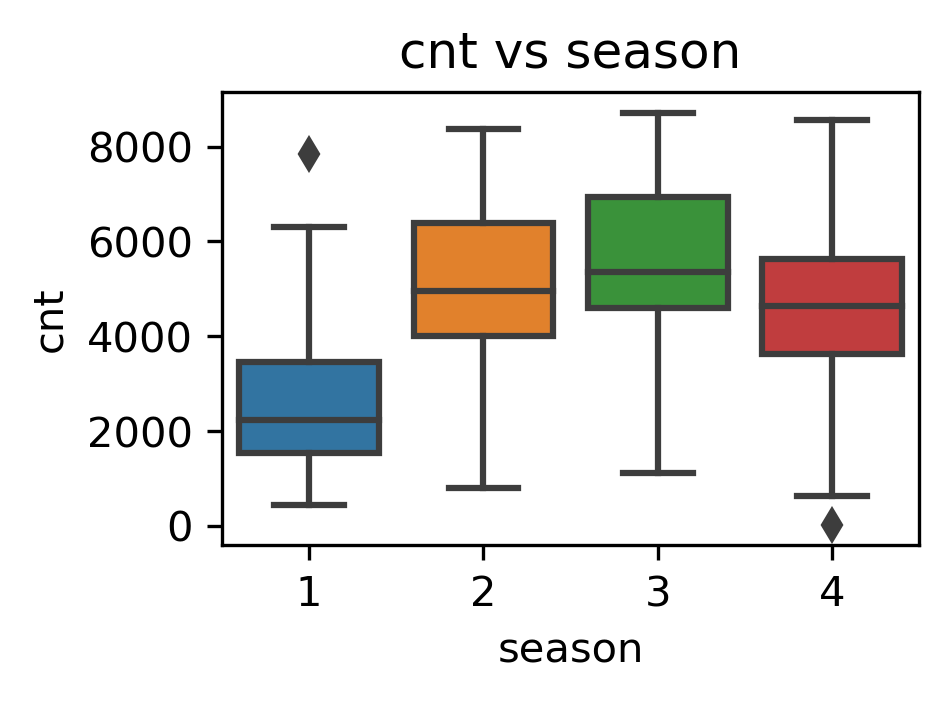

In [8]:
plt.figure(figsize=(3,2),dpi=300)
plt.title('cnt vs season')
sns.boxplot(x=df.season,y=df.cnt);

From the above boxplot, we see that season1 which is spring (refer data dictionary) has the lowest number of bike shares and season3 which is fall has the highest number of bike shares.

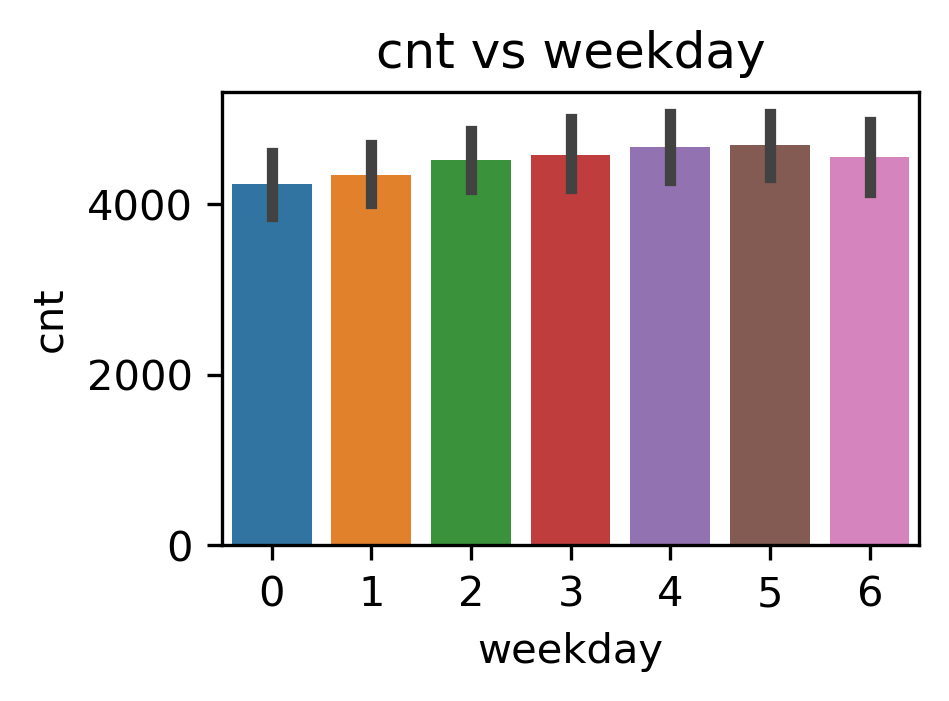

In [9]:
plt.figure(figsize=(3,2),dpi=300)
plt.title('cnt vs weekday')
sns.barplot(x=df.weekday,y=df.cnt);

From the above barplot, we can see that the number of bike shares is more or less same across all weekdays. By analyzing the data, we can figure out that 0 and 6 are weekends (holidays), inpsite of that the number of shares on weekends are almost same as regular working days

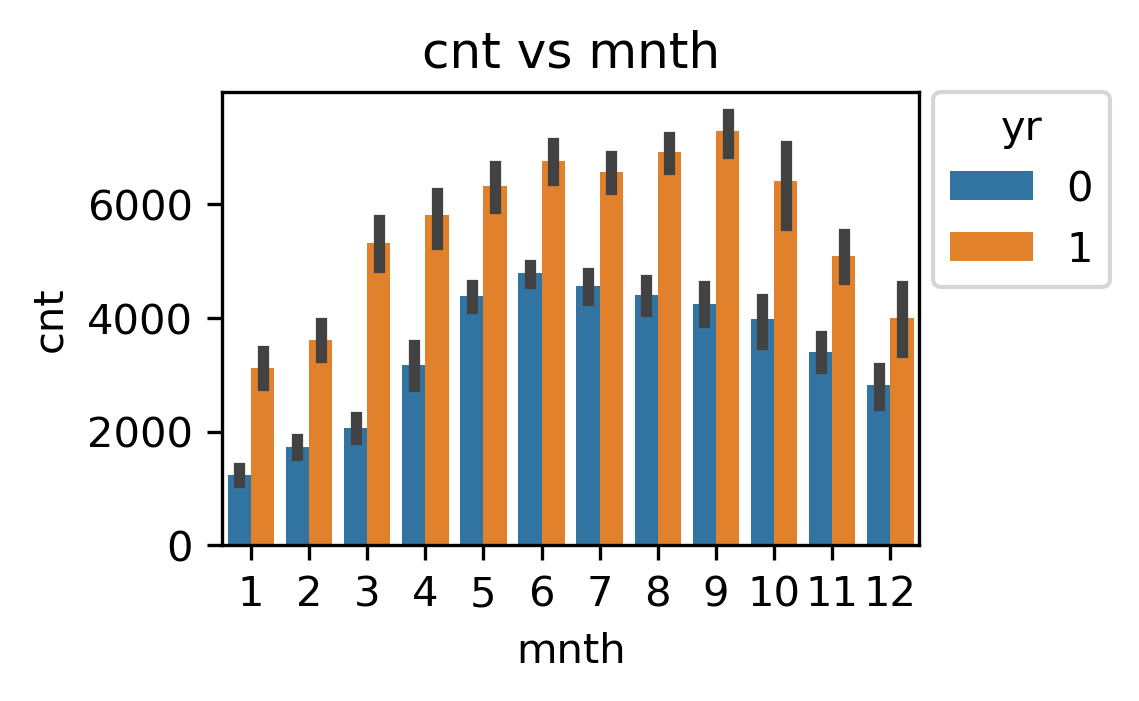

In [10]:
plt.figure(figsize=(3,2),dpi=300)
plt.title('cnt vs mnth')
sns.barplot(x=df.mnth,y=df.cnt, hue=df.yr)
plt.legend(loc=(1.02,0.57), title='yr');

We've already (partially) captured the monthly trends in the <b><font color='navy'>cnt vs season</font></b> plot. So this graph of <b><font color='navy'>cnt vs mnth</font></b> is not giving us any more information. But by adding hue of <b><font color='navy'>yr</font></b> where <b><font color='navy'>0: 2018</font></b> and <b><font color='navy'>1: 2019</font></b>. We clearly see that, the bike sharing app is doing much better in the year <b><font color='navy'>2019</font></b>.

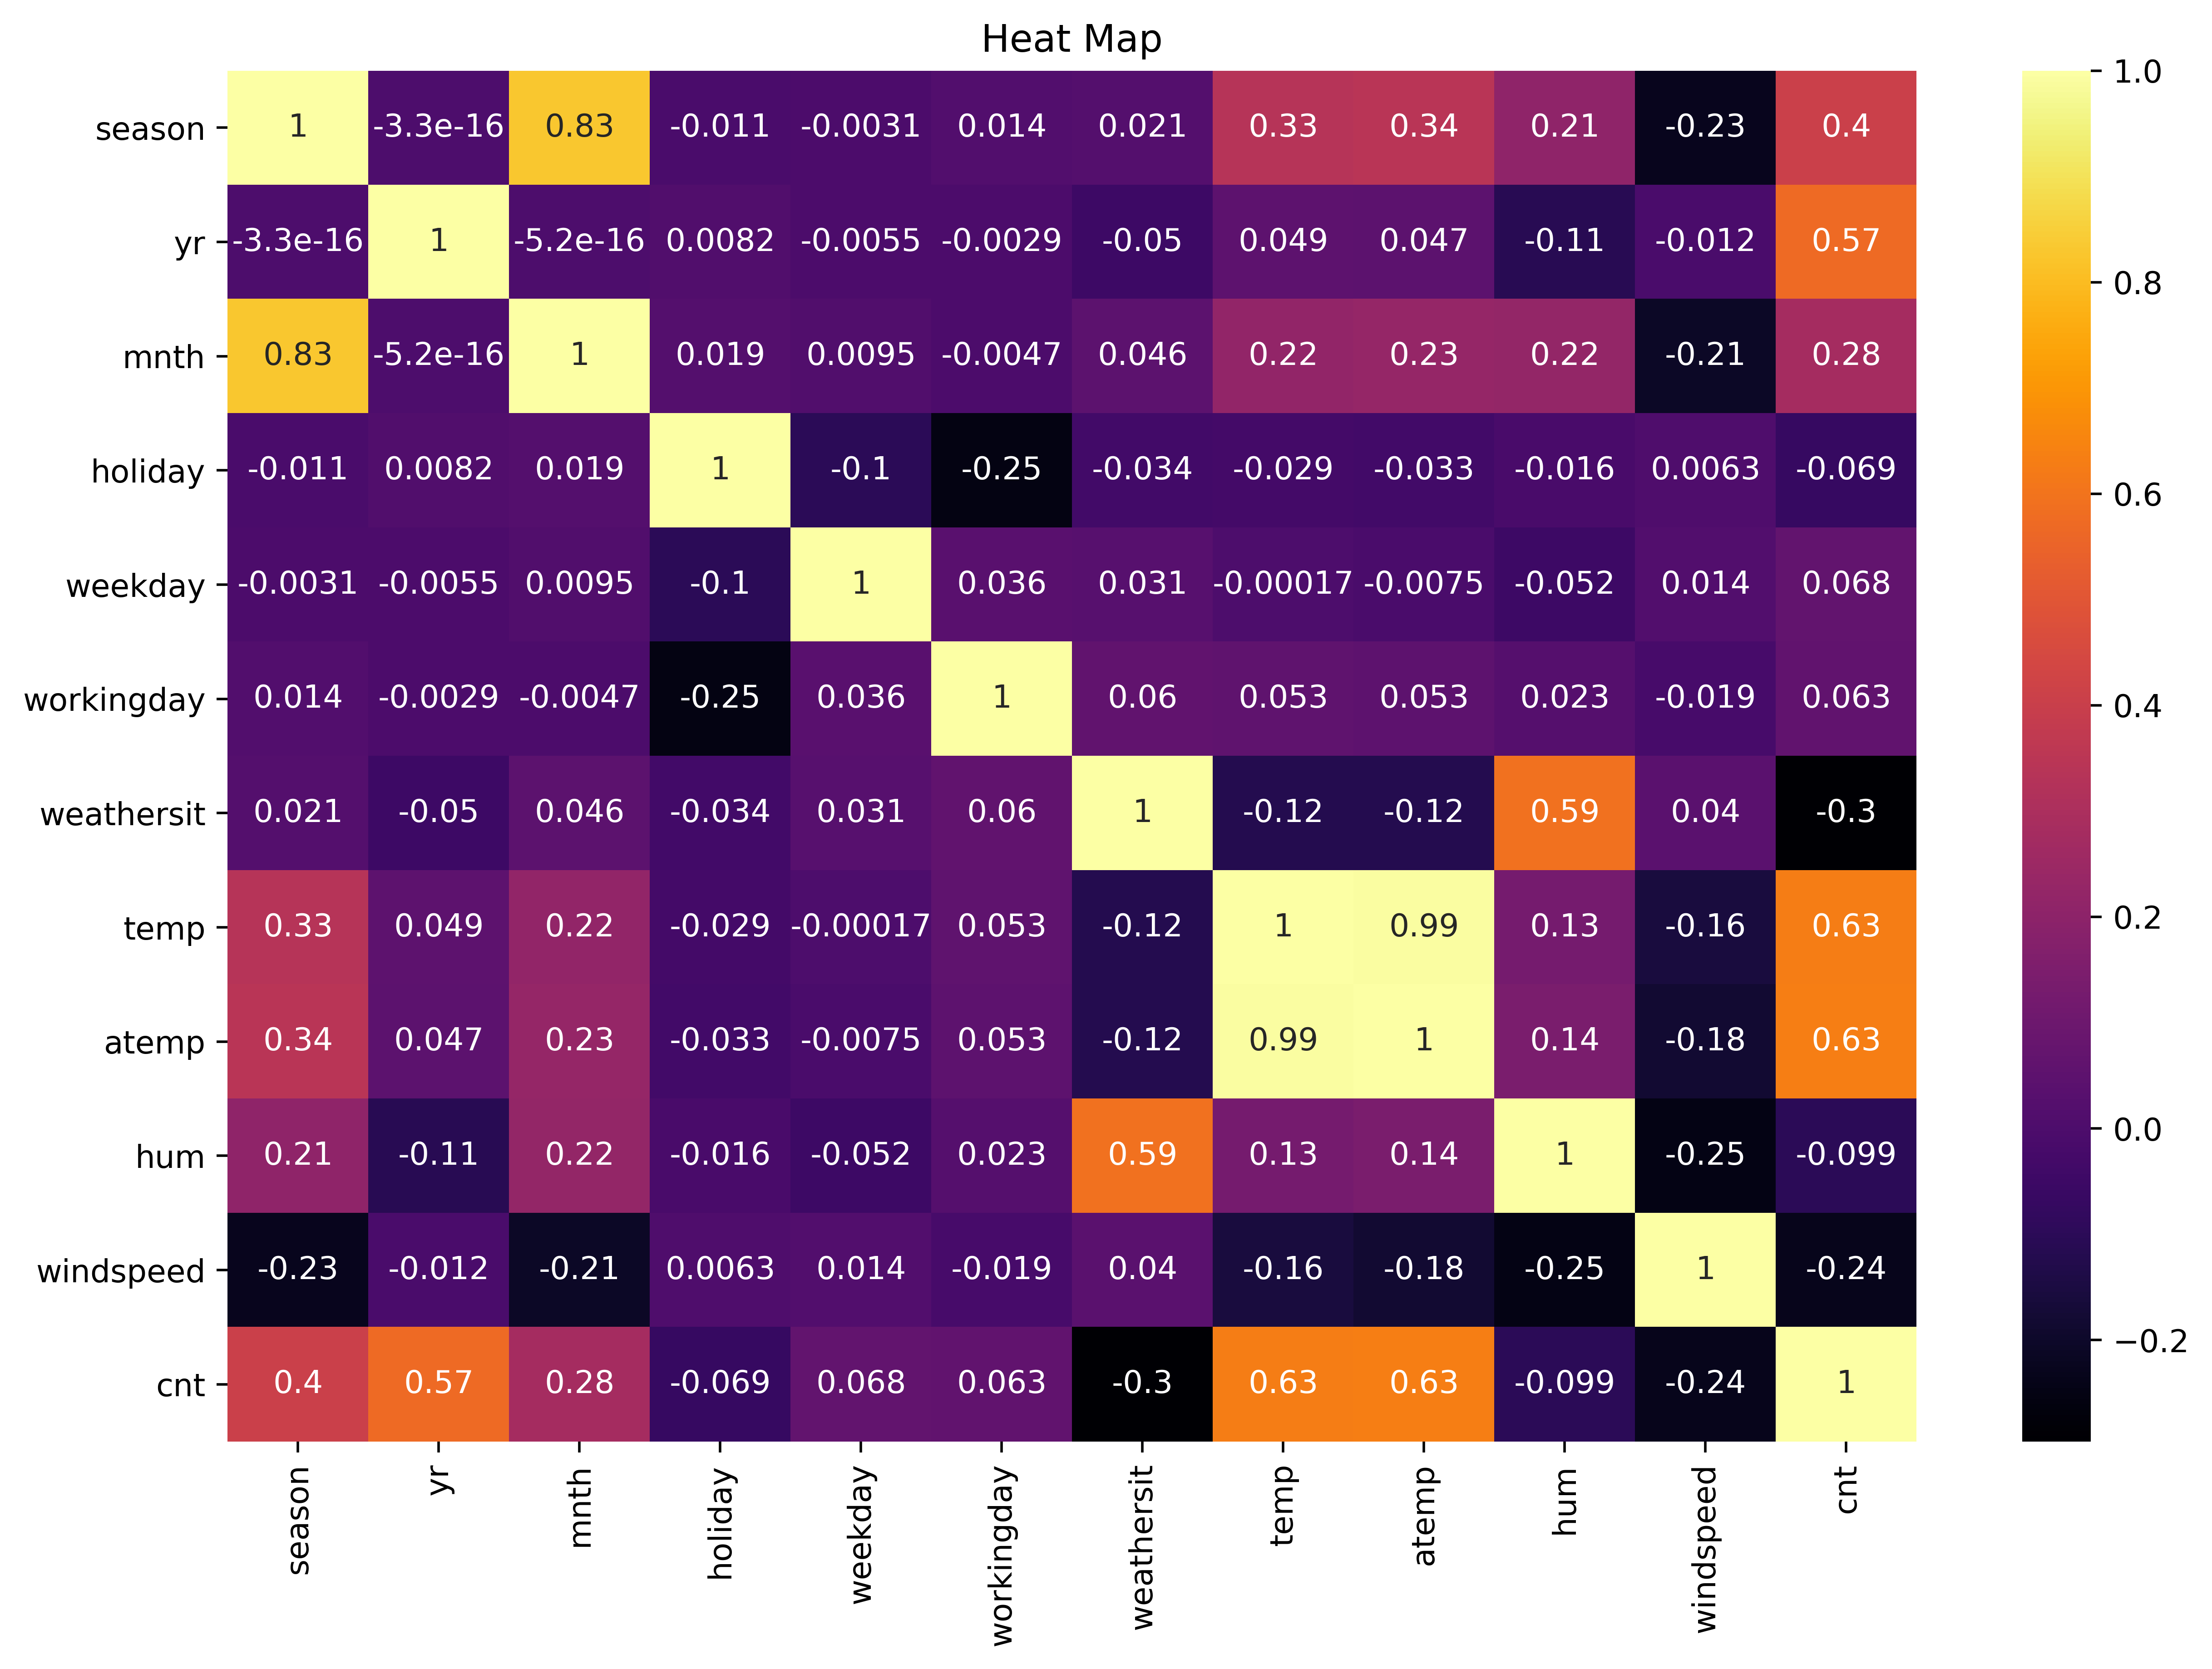

In [11]:
#Analyzing the correlation between the variables
plt.figure(figsize=(12,8),dpi=500)
plt.title('Heat Map')
sns.heatmap(df.corr(), annot=True, cmap='inferno');

In the above heatmap, we clearly see that there's 99% correlation between <font color='navy'><b>temp</b></font> and <font color='navy'><b>atemp</b></font>. Let us drop <font color='navy'><b>temp</b></font>. Though there's 83% correlation between <font color='navy'><b>mnth</b></font> and <font color='navy'><b>season</b></font>. Let us not remove any of them, as season is a categorical variable and we'll subject it to <font color='darkred'><b>one-hot encoding</b></font> later. Almost all other significant correlations can be seen along the target variable, of course we wouldn't want to remove those variables correlated with the target variable.

In [12]:
df.drop(['temp'], axis=1, inplace=True)

# <font color='Navy'><u>Data Preprocessing<u></font>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [14]:
#Let us do train_test_split
df_train,df_test=train_test_split(df, test_size=0.3, random_state=101)

Let us now start applying <font color='darkred'><b>One-Hot Encoding<b></font> on all the nominal categorical variables like <font color='navy'><b>mnth</b></font>, <font color='navy'><b>season</b></font> & <font color='navy'><b>weathersit</b></font>. Also we are going to use <font color='darkred'><b>drop='first'</b></font> to avoid multicollinearity.

In [15]:
#instantiating OneHotEncoder objects
ohe=OneHotEncoder(drop='first', handle_unknown='error')

In [16]:
#preparing the appropriate column names 
colnames=[]
mydict={'s':3,'w':2,'m':11}
for let in 'smw':
    for i in range(2,mydict[let]+2):
        colnames.append(let+str(i))

In [17]:
#apply OHE on season, mnth & weathersit all of which are nominal categorical variables
ohe.fit(df_train[['season','mnth','weathersit']])

OneHotEncoder(drop='first')

Note that we fit the above <font color='darkred'><b>One-Hot Encoding<b></font> on <font color='darkgreen'><b>train_set</b></font> only and using the same parameters we'll transform both the <font color='darkgreen'><b>train_set</b></font> and <font color='darkgreen'><b>test_set</b></font>

In [18]:
df_train_ohe=pd.DataFrame(ohe.transform(df_train[['season','mnth','weathersit']]).toarray(), columns=colnames, index=df_train.index)

In [19]:
df_train_final=pd.concat([df_train_ohe, df_train.drop(['season','mnth','weathersit'],axis=1)],axis=1)

In [20]:
df_test_ohe=pd.DataFrame(ohe.transform(df_test[['season','mnth','weathersit']]).toarray(), columns=colnames, index=df_test.index)

In [21]:
df_test_final=pd.concat([df_test_ohe, df_test.drop(['season','mnth','weathersit'],axis=1)],axis=1)

Here we are going to normalize both <font color='navy'><b>df_train_final<b></font>, <font color='navy'><b>df_test_final<b></font> using the <font color='darkred'><b>MinMaxScaler<b></font> object. 

In [22]:
#MinMaxScaling aka Normalization
norm=MinMaxScaler()
#Fitting the scaler on the train_set
norm.fit(df_train_final)

MinMaxScaler()

In [23]:
#Transforming both the sets
df_train_model=norm.transform(df_train_final)
df_test_model=norm.transform(df_test_final)

Segregating <font color='navy'><b>predictor variables<b></font> and <font color='navy'><b>target variable<b></font> on both the <font color='navy'><b>train_set<b></font> and <font color='navy'><b>test_set<b></font>

In [24]:
X_train=pd.DataFrame(df_train_model[:,:23], columns=df_train_final.columns[:-1])
y_train=pd.DataFrame(df_train_model[:,23], columns=[df_train_final.columns[-1]])
X_test=pd.DataFrame(df_test_model[:,:23], columns=df_test_final.columns[:-1])
y_test=pd.DataFrame(df_test_model[:,23], columns=[df_test_final.columns[-1]])

# <font color='Navy'><u>Model Building<u></font>

In [25]:
from sklearn.linear_model import LinearRegression

# <font color='darkgreen'><u>Building first model: mlr1</u></font>
Here we are creating our first multiple linear regression model <font color='darkgreen'><font size=3><b>mlr1</b></font></font> without doing any <font color='darkred'><b>feature_selection<b></font>, we're considering the whole set of features as is, in our model

In [26]:
mlr1=LinearRegression()

In [27]:
#Fitting the training data on the above linear regression object
mlr1.fit(X_train,y_train)

LinearRegression()

In [28]:
#Making predictions off of the training data using the above multiple linear regression model
y_train_pred=mlr1.predict(X_train)

Importing the <font color='navy'><b>r2_score<b></font> metric to evaluate the performance on the training data and eventually the testing data

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_train=r2_score(y_train, y_train_pred)
r2_train

0.8430687474129148

# <font color='Orange'><u>Residual Analysis (mlr1)</u></font>

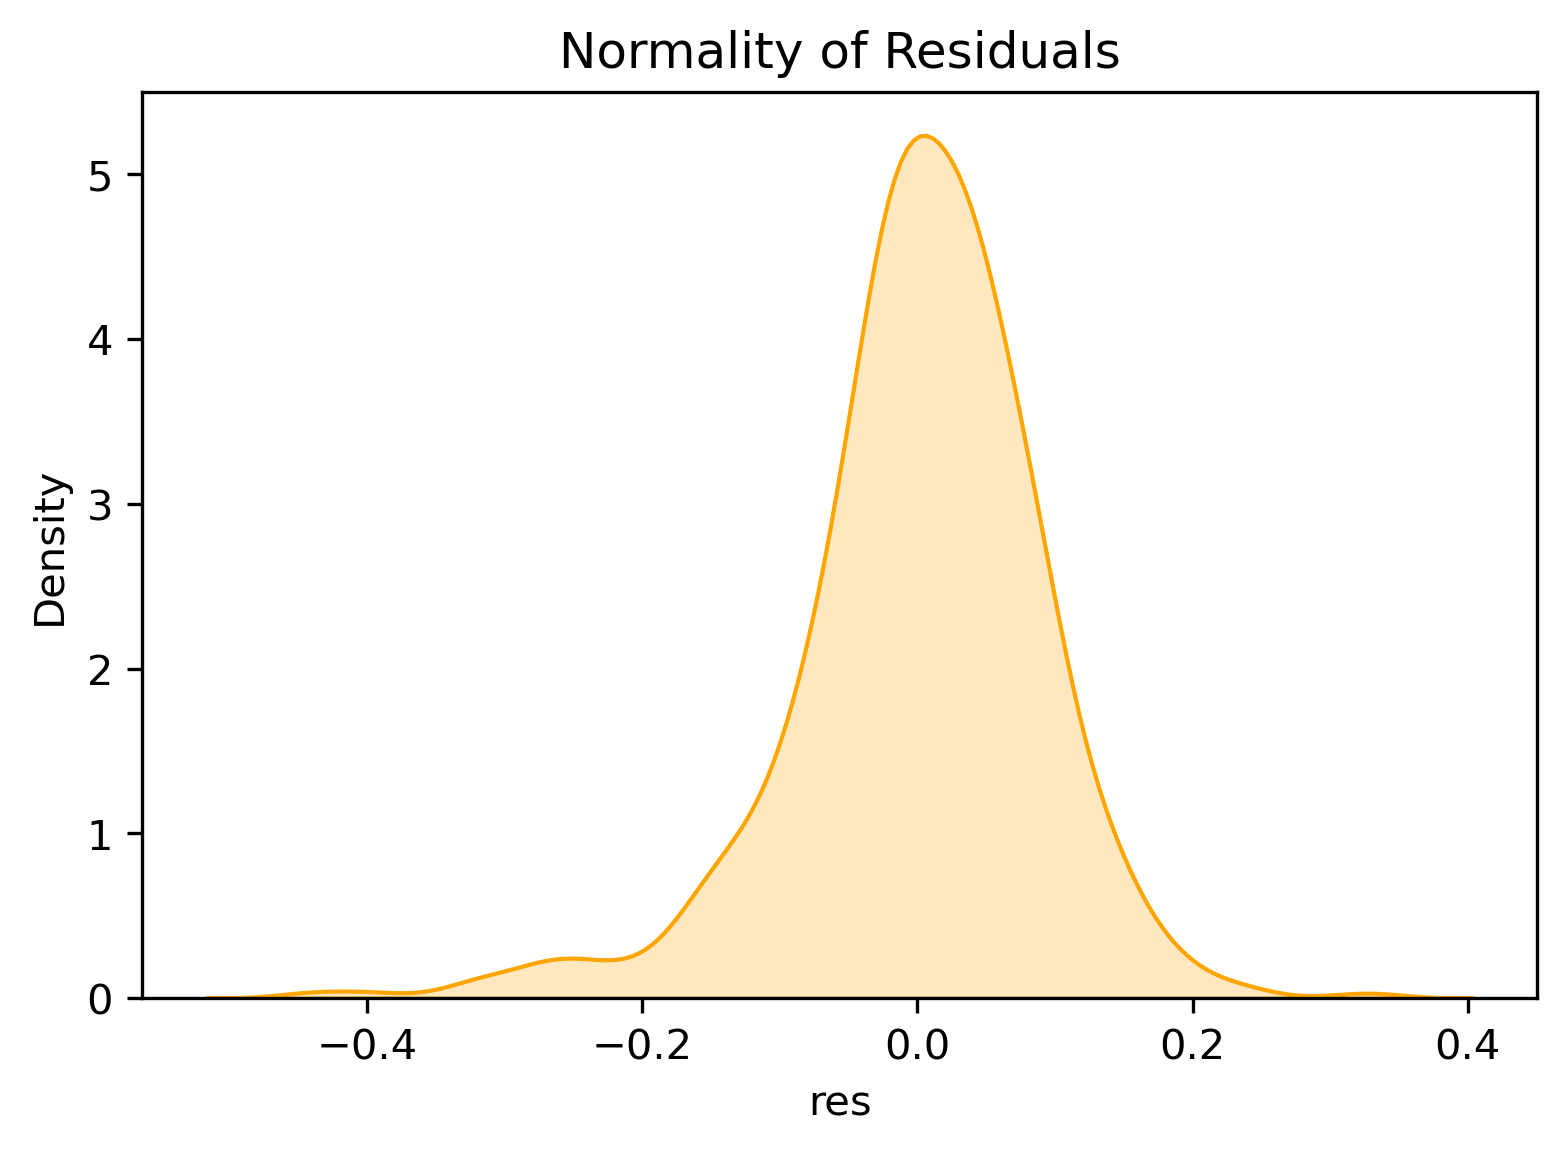

In [31]:
#Plotting the kdeplot for the residuals of the training set
res=y_train-y_train_pred
plt.figure(dpi=300)
plt.title('Normality of Residuals')
sns.kdeplot(res.cnt, shade=True, color='Orange')
plt.xlabel('res');

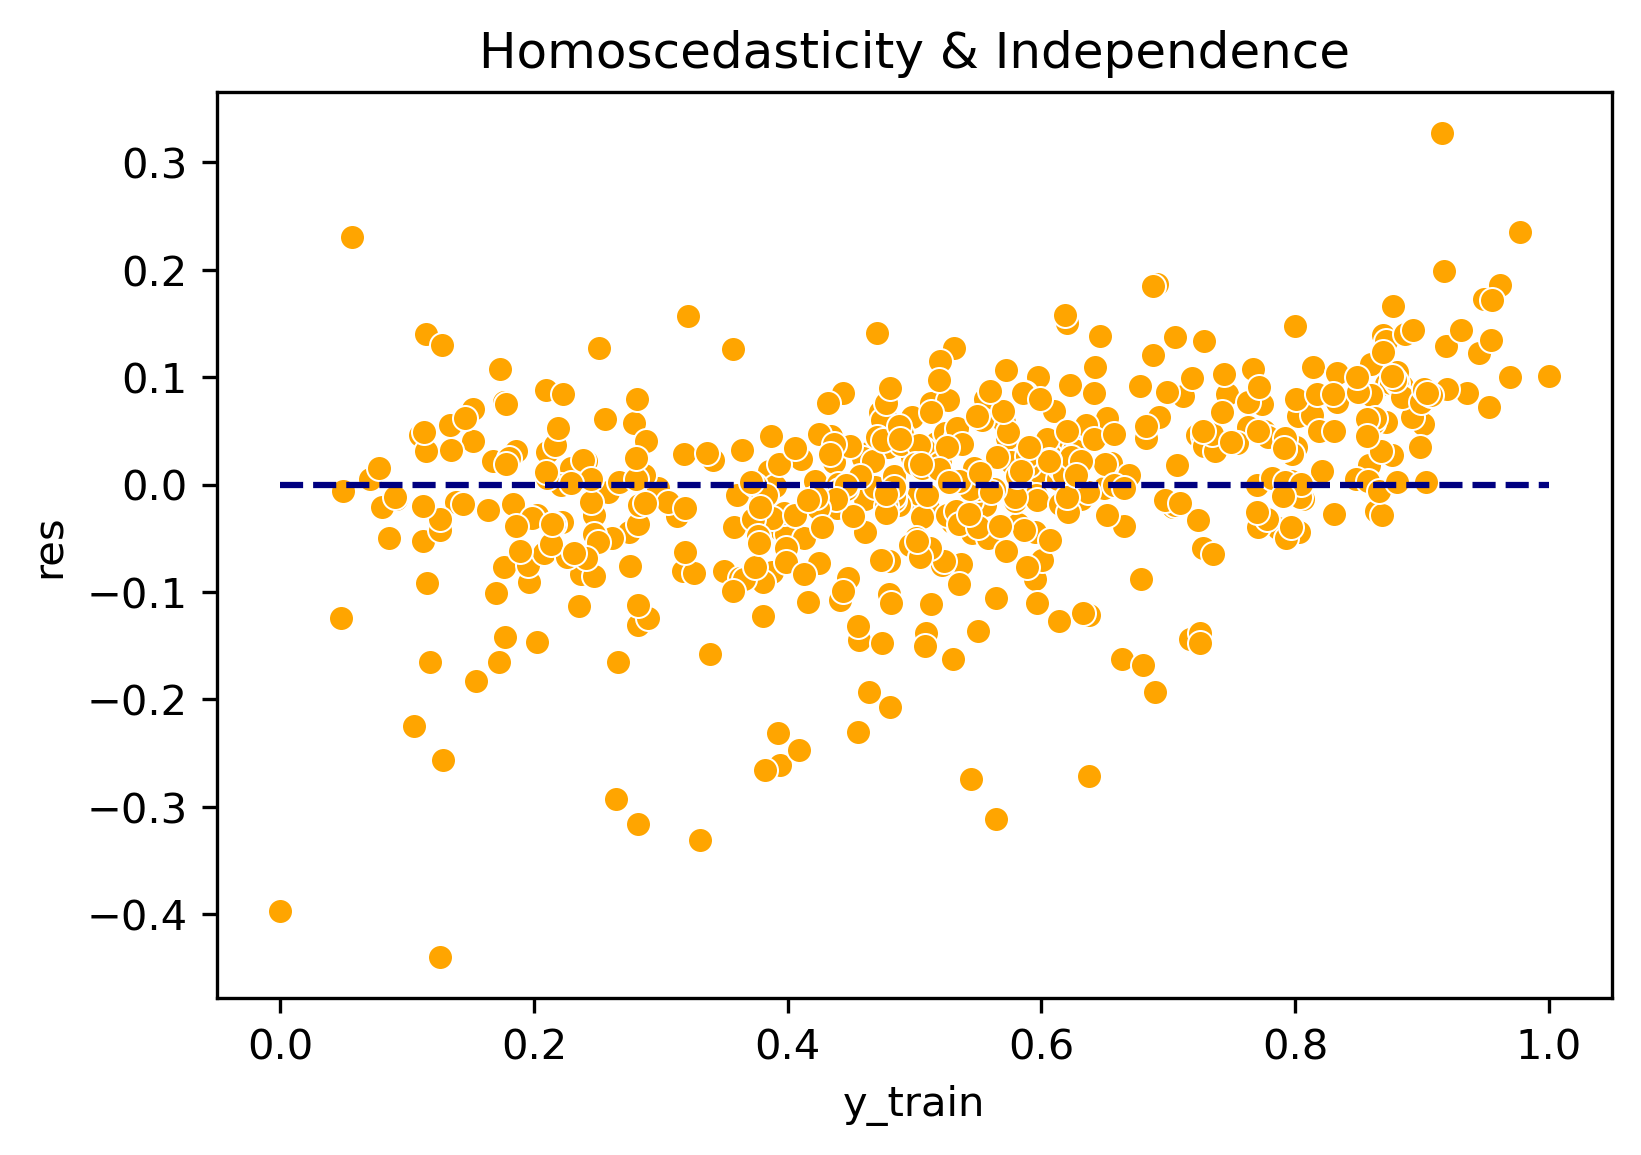

In [32]:
#Plotting the residuals against the actuals of the training set
plt.figure(dpi=300)
plt.title('Homoscedasticity & Independence')
sns.scatterplot(x=y_train.cnt,y=res.cnt, color='Orange')
plt.ylabel('res')
plt.xlabel('y_train')
sns.lineplot(x=y_train.cnt,y=0, color='navy', ls='--');

From the above plots, we clearly see that all the assumptions of linear regression, particularly the normality of residuals, homoscedasticity and independence of residuals are satisfied. Hence we can make inference using this linear model

In [33]:
#Making predictions off of the testing data using the above multiple linear regression model
y_test_pred=mlr1.predict(X_test)

In [34]:
r2_test=r2_score(y_test, y_test_pred)
r2_test

0.850576042952973

# <font color='red'><u>mlr1 Model Performance:</u></font>
<font color='red'><b>Number of features=23</b></font><br/>
<font color='red'><b>r2_train=0.84</b></font><br/>
<font color='red'><b>r2_test=0.85</b></font>

Here we can clearly see that the <font color='navy'><b>r2_score<b></font> of the <font color='darkred'><b>test_set<b></font> is very close to that of the <font color='darkred'><b>train_set<b></font> which means that our first <b>multiple linear regression model</b> <font color='darkgreen'><b>mlr1<b></font> is generalizing well to the unseen data. However this <font color='darkgreen'><b>mlr1<b></font> model is somewhat complex as it involves <font color='navy'><b>23 predictor variables<b></font>

# <font color='darkgreen'><u>Building second model: mlr2</u></font>

Let us now create our second multiple linear regression model <font color='darkgreen'><font size=3><b>mlr2</b></font></font> by using both automated feature selection (more of an elimination actually!) techniques such as <font color='darkred'><b>RFE<b></font> (Recursive Feature Elimination) and manually eliminating variables using metrics such as <font color='darkred'><b>VIF<b></font> (Variance Inflation Factor) and <font color='darkred'><b>p-values<b></font> of the coefficients

In [35]:
from sklearn.feature_selection import RFE

First let us narrow down the number of features to 15 using <font color='darkred'><b>RFE<b></font> (Recursive Feature Elimination)

In [36]:
rfe=RFE(mlr1,15)

In [37]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [38]:
#Checking the features,their RFE rank, their RFE support and the absolute value of their coefficients
l=list(zip(X_train.columns,rfe.ranking_,rfe.support_, abs(mlr1.coef_[0])))
l.sort(key=lambda x:x[-1], reverse=True)
l=pd.DataFrame(l)
l.columns=['features','ranking','support','|coeff|']
l

,features,ranking,support,|coeff|
0,atemp,1,True,0.446196
1,yr,1,True,0.237524
2,w3,1,True,0.226631
3,s4,1,True,0.189634
4,windspeed,1,True,0.178413
5,hum,1,True,0.161105
6,m9,1,True,0.124800
7,s2,1,True,0.102514
8,m5,1,True,0.090197
9,holiday,1,True,0.086724


In [39]:
#We are reducing the predictor variables to just 15 using rfe.support_ as boolean mask
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_test_rfe=X_test[X_test.columns[rfe.support_]]

In [40]:
import statsmodels.api as sm

In [41]:
#adding constant term, it has to be done manually in statsmodel api
X_train_rfe=sm.add_constant(X_train_rfe)
X_test_rfe=sm.add_constant(X_test_rfe)
#here we are creating another linear model using statsmodel
lm=sm.OLS(y_train,X_train_rfe)
lm=lm.fit()

In [42]:
#Finding the r2_score for the training data
y_train_pred_rfe=lm.predict(X_train_rfe)
r2_train_rfe=r2_score(y_train,y_train_pred_rfe)
#Finding the r2_score for the testing data
y_test_pred_rfe=lm.predict(X_test_rfe)
r2_test_rfe=r2_score(y_test,y_test_pred_rfe)
print(f'r2_train_rfe={r2_train_rfe},\nr2_test_rfe={r2_test_rfe}')

r2_train_rfe=0.8365682625088394,
r2_test_rfe=0.8390530466745344


In [43]:
#Let us further analyze the above model using the following statistical summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.34e-183
Time:                        20:16:17   Log-Likelihood:                 494.87
No. Observations:                 511   AIC:                            -957.7
Df Residuals:                     495   BIC:                            -890.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2206      0.025      8.743      0.0

After applying <font color='darkred'><b>RFE<b></font> with 15 features_to_select. Now we're going to manually eliminate the variables using the above summary statistics. Clearly we don't have to eliminate any variable based on the <font color='darkred'><b>p-values<b></font> of the coefficients. Because no <font color='darkred'><b>p-value<b></font> is statistically significant, that leaves us with relying only on <font color='darkred'><b>VIF<b></font> (Variance Inflation Factor) to eliminate the variables

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
#Figuring out the VIF of the above 15 features
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by='VIF',ascending=False).iloc[1:6,:]

,features,VIF
2,s3,5.719799
13,atemp,3.644933
1,s2,3.067267
3,s4,2.388715
14,hum,2.257917


From the above <font color='darkred'><b>VIF<b></font> table, we clearly see that the only feature to have high <font color='darkred'><b>VIF<b></font> (ie greater than 5) is <font color='darkred'><b>s3<b></font>. Hence we are going to eliminate only <font color='darkred'><b>s3<b></font> feature. 
Note: Here we are going to eliminate <font color='darkred'><b>const<b></font>, not because it has extremely high <font color='darkred'><b>VIF<b></font>, we're eliminating it because we added this as a dummy feature in our model built using <font color='darkgreen'><b>statsmodel.api<b></font> whereas in <font color='darkgreen'><b>sklearn<b></font> this <font color='darkred'><b>const<b></font> feature is considered by default

In [46]:
X_train_rfe.drop(['const','s3'],axis=1,inplace=True)
X_test_rfe.drop(['const','s3'],axis=1,inplace=True)

In [47]:
mlr2=LinearRegression()

In [48]:
#Fitting the training data on the above linear regression object
mlr2.fit(X_train_rfe,y_train)

LinearRegression()

In [49]:
#Making predictions off of the training data using the above multiple linear regression model
y_train_pred_rfe=mlr2.predict(X_train_rfe)
r2_train_rfe=r2_score(y_train,y_train_pred_rfe)
r2_train_rfe

0.8329351636799299

# <font color='Orange'><u>Residual Analysis (mlr2)</u></font>

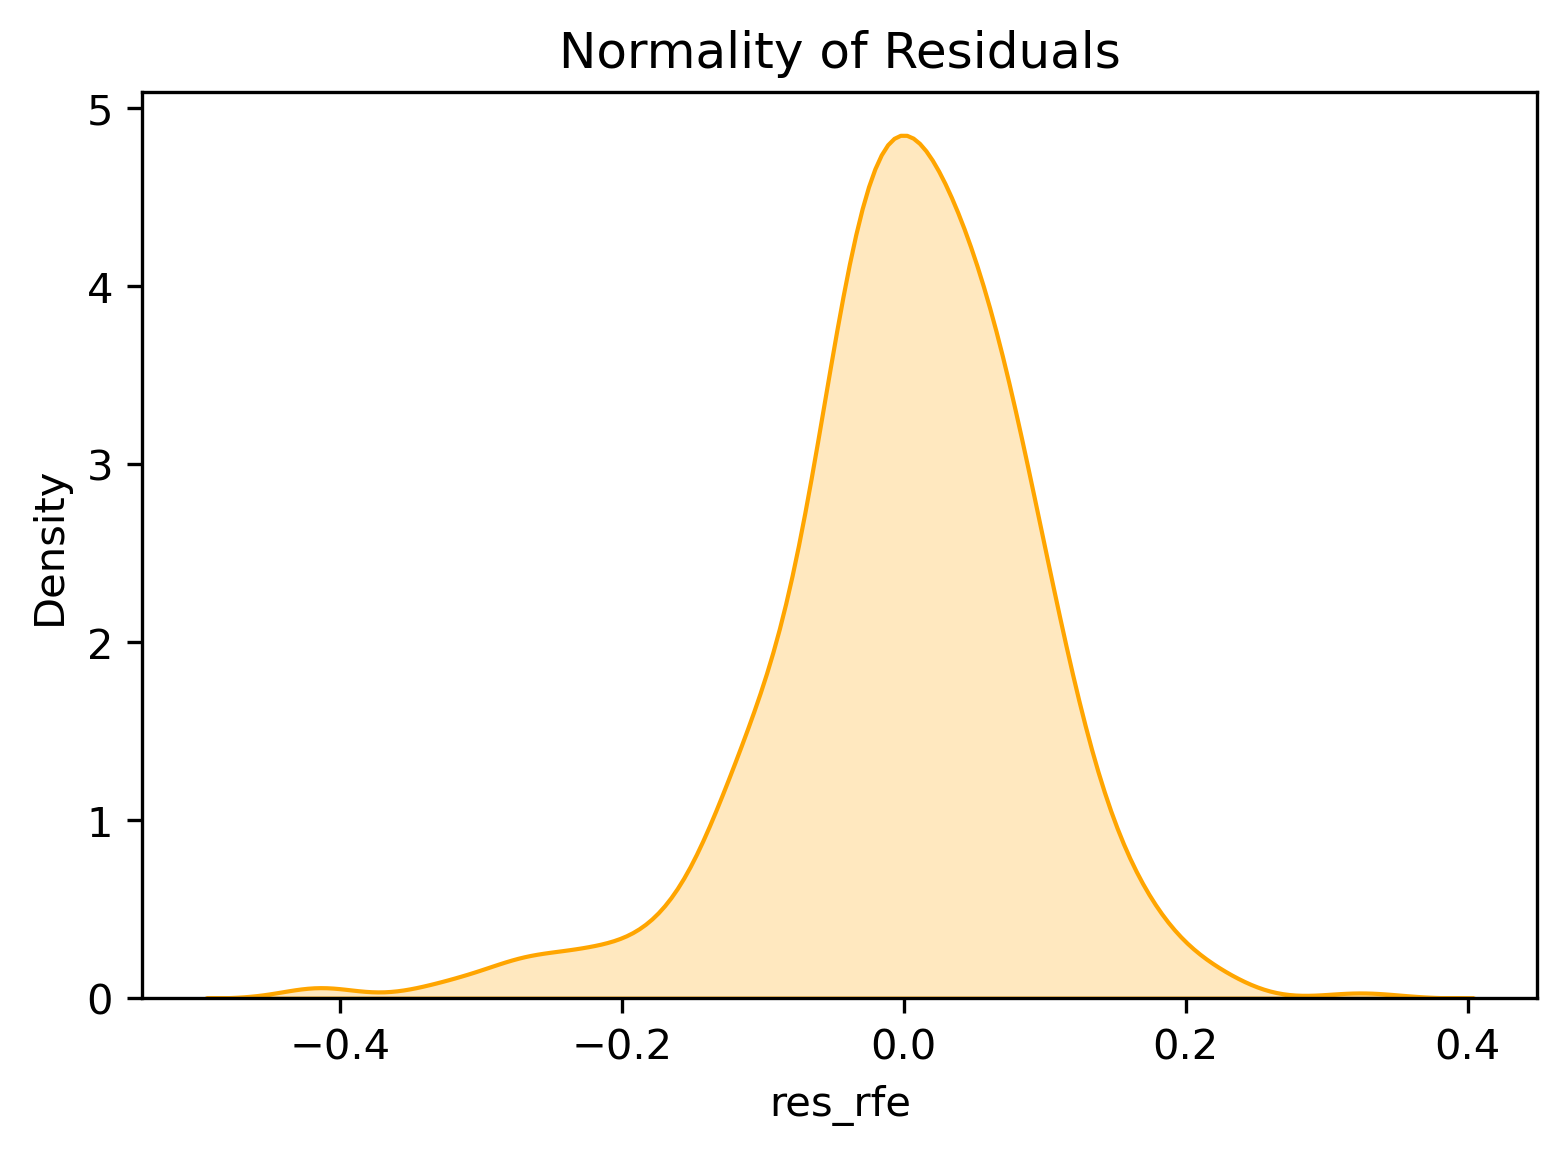

In [50]:
#Plotting the kdeplot for the residuals of the training set
res_rfe=y_train-y_train_pred_rfe
plt.figure(dpi=300)
plt.title('Normality of Residuals')
sns.kdeplot(res_rfe.cnt, shade=True, color='Orange')
plt.xlabel('res_rfe');

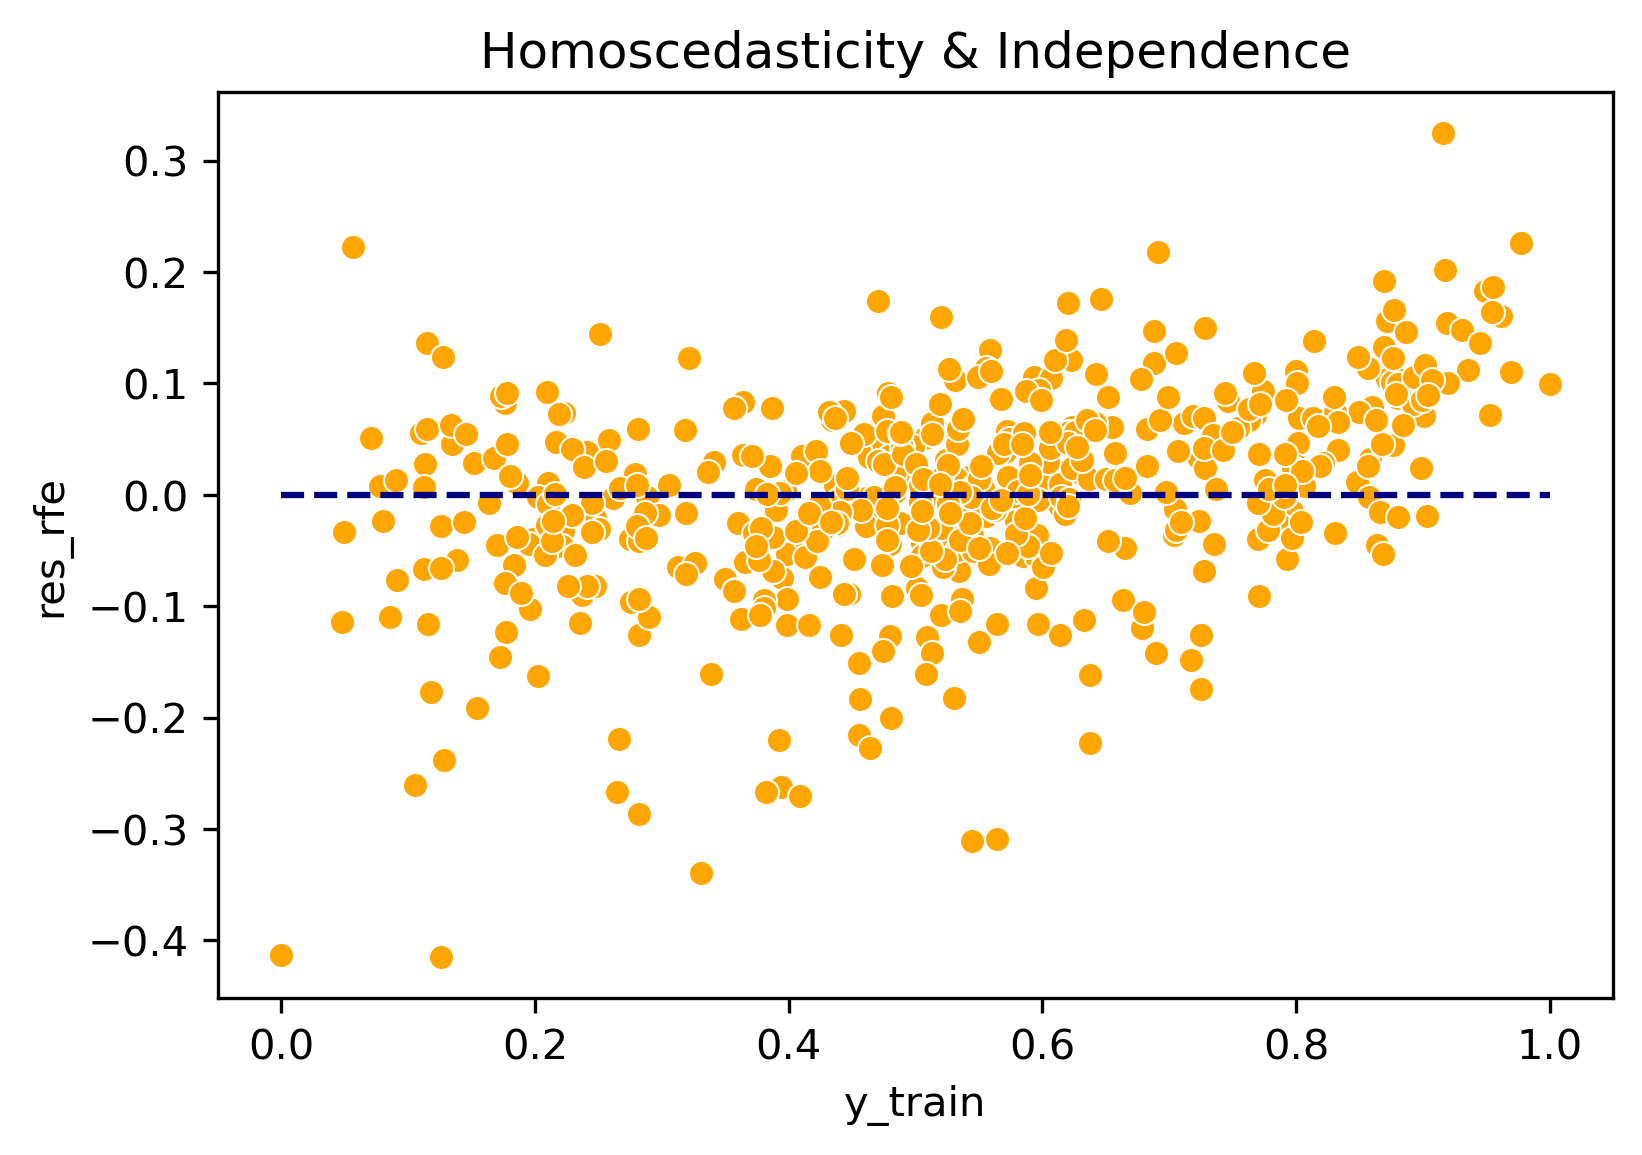

In [51]:
#Plotting the residuals against the actuals of the training set
plt.figure(dpi=300)
plt.title('Homoscedasticity & Independence')
sns.scatterplot(x=y_train.cnt,y=res_rfe.cnt, color='Orange')
plt.ylabel('res_rfe')
plt.xlabel('y_train')
sns.lineplot(x=y_train.cnt,y=0, color='navy', ls='--');

From the above plots, we clearly see that all the assumptions of linear regression, particularly the normality of residuals, homoscedasticity and independence of residuals are satisfied. Hence we can make inference using this linear model

In [52]:
#Making predictions off of the testing data using the above multiple linear regression model
y_test_pred_rfe=mlr2.predict(X_test_rfe)
r2_test_rfe=r2_score(y_test,y_test_pred_rfe)
r2_test_rfe

0.8297041186218315

# <font color='red'><u>mlr2 Model Performance:</u></font>
<font color='red'><b>Number of features=14</b></font><br/>
<font color='red'><b>r2_train_rfe=0.83</b></font><br/>
<font color='red'><b>r2_test_rfe=0.83</b></font>

Here we can clearly see that the <font color='navy'><b>r2_score<b></font> of the <font color='darkred'><b>test_set<b></font> is almost same as that of the <font color='darkred'><b>train_set<b></font> which means that our second <b>multiple linear regression model</b> <font color='darkgreen'><b>mlr2<b></font> is generalizing well to the unseen data. However this <font color='darkgreen'><b>mlr2<b></font> model is built mainly based on automated feature selection techniques such as <font color='darkred'><b>RFE<b></font> in which we may completely miss out on some features which has high business interpretation
    
# <font color='darkgreen'><u>Building third model: mlr3</u></font>

Let us now create our third multiple linear regression model <font color='darkgreen'><font size=3><b>mlr3</b></font></font> by retaining variables which has high business interpretation. By applying domain knowledge and also applying little bit of trial-and-error method we see that the variable <font color='darkred'><b>month</b></font> is a better predictor as compared with <font color='darkred'><b>season</b></font> or <font color='darkred'><b>weathersit</b></font>. Hence we build our third model with all predictors except for <font color='darkred'><b>season</b></font> & <font color='darkred'><b>weathersit</b></font>

In [53]:
X_train_new=X_train[['m2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
       'm11', 'm12', 'yr', 'holiday', 'weekday', 'workingday',
       'atemp', 'hum', 'windspeed']]
X_test_new=X_test[['m2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
       'm11', 'm12', 'yr', 'holiday', 'weekday', 'workingday',
       'atemp', 'hum', 'windspeed']]

In [54]:
mlr3=LinearRegression()

In [55]:
#Fitting the training data on the above linear regression object
mlr3.fit(X_train_new,y_train)

LinearRegression()

In [56]:
#Making predictions off of the training data using the above multiple linear regression model
y_train_pred_new=mlr3.predict(X_train_new)
r2_train_new=r2_score(y_train,y_train_pred_new)
r2_train_new

0.8031426455628246

# <font color='Orange'><u>Residual Analysis (mlr3)</u></font>

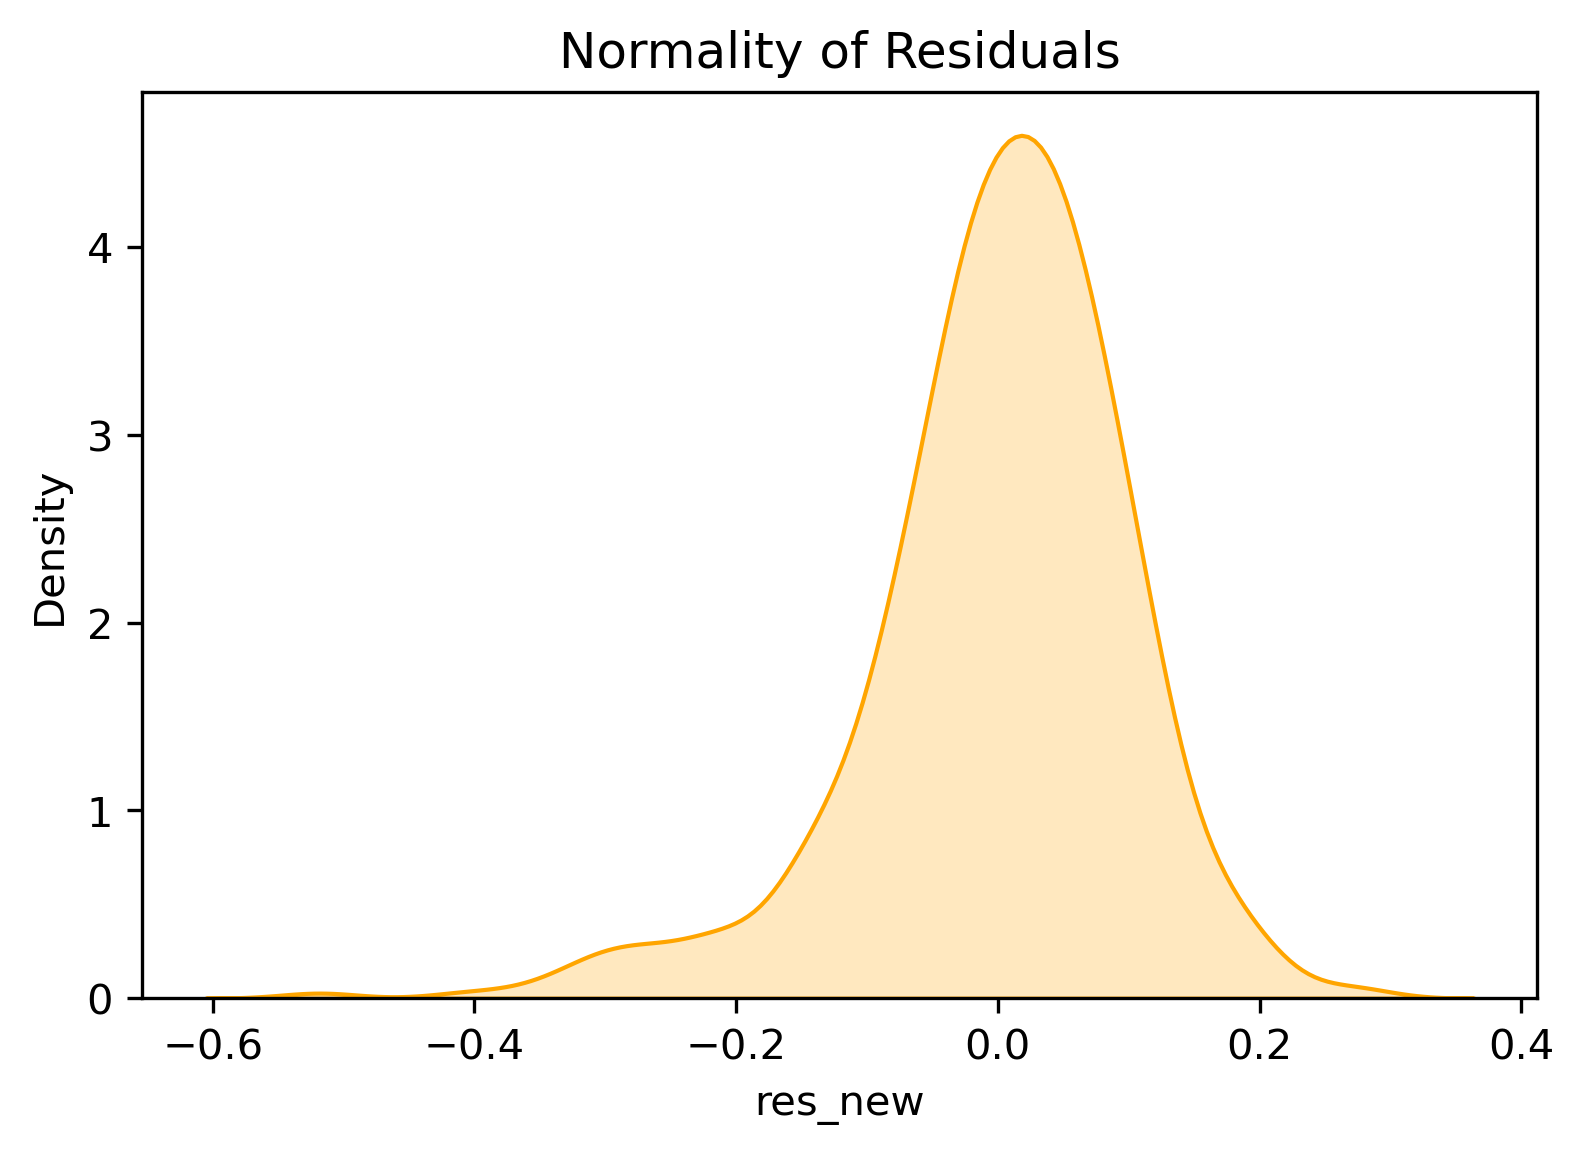

In [57]:
#Plotting the kdeplot for the residuals of the training set
res_new=y_train-y_train_pred_new
plt.figure(dpi=300)
plt.title('Normality of Residuals')
sns.kdeplot(res_new.cnt, shade=True, color='Orange')
plt.xlabel('res_new');

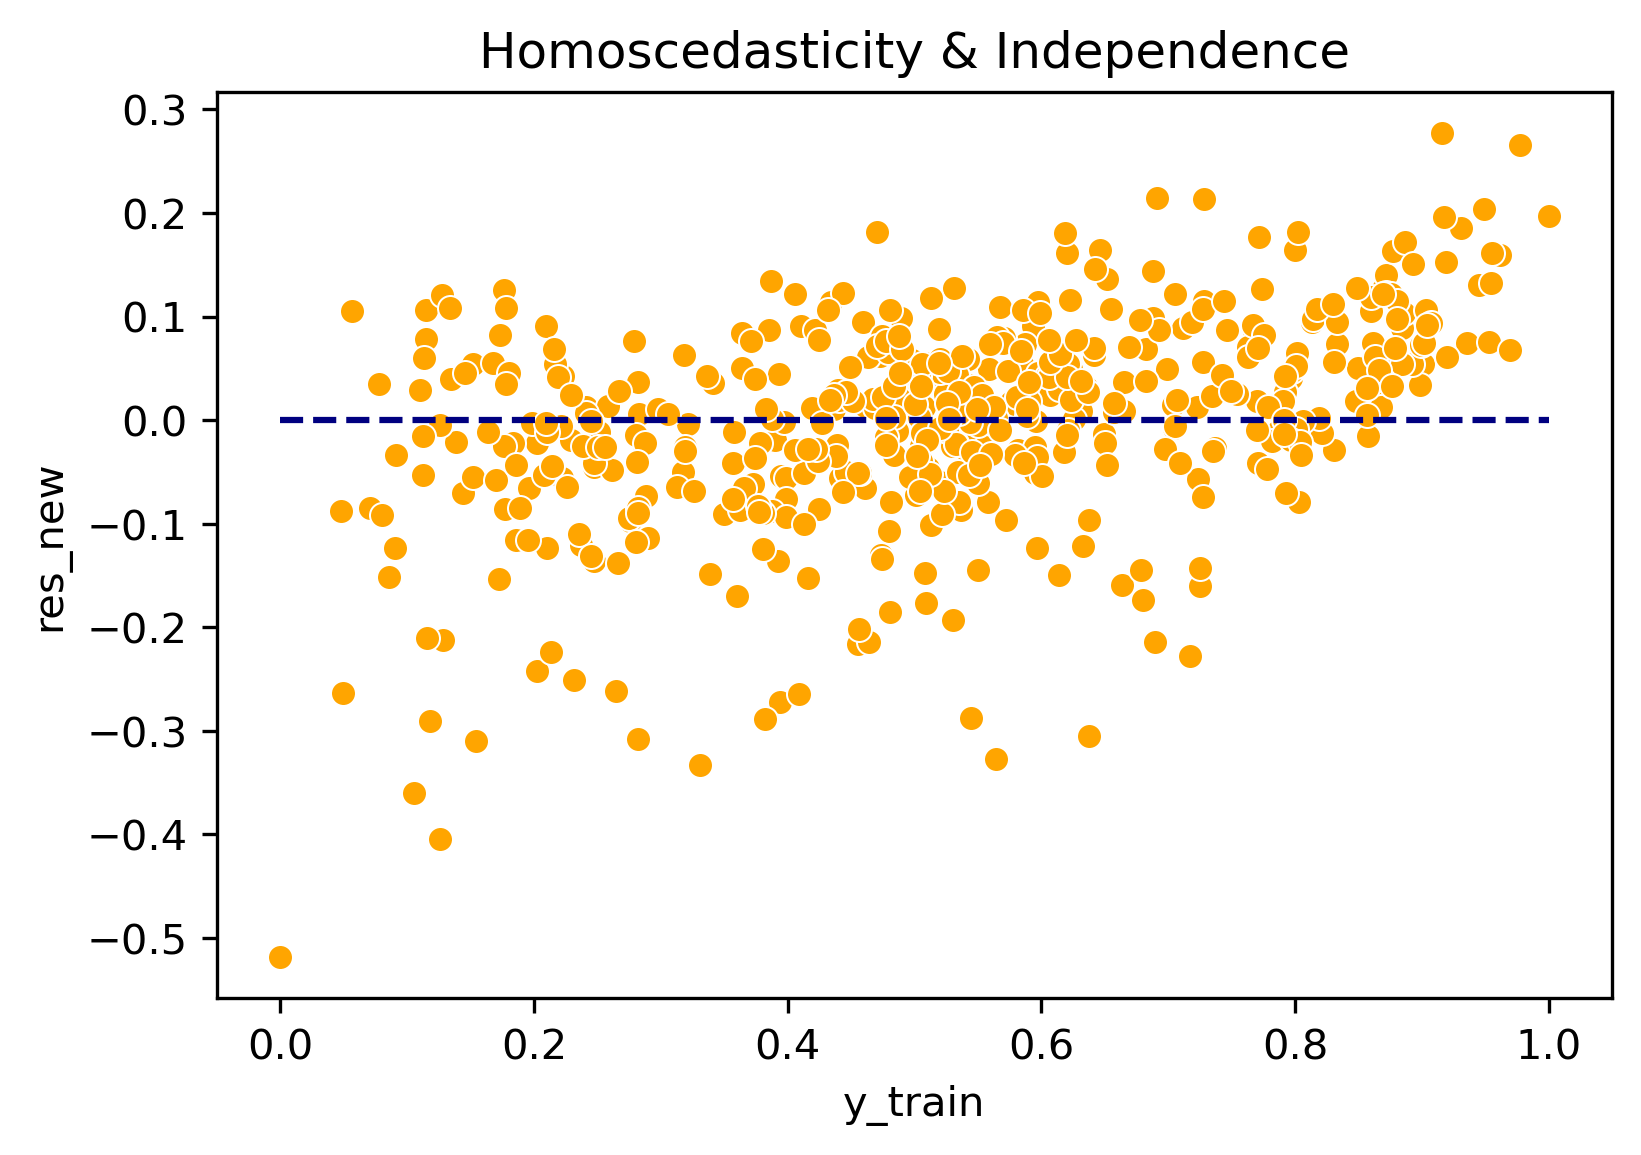

In [58]:
#Plotting the residuals against the actuals of the training set
plt.figure(dpi=300)
plt.title('Homoscedasticity & Independence')
sns.scatterplot(x=y_train.cnt,y=res_new.cnt, color='Orange')
plt.xlabel('y_train')
plt.ylabel('res_new')
sns.lineplot(x=y_train.cnt,y=0, color='navy', ls='--');

From the above plots, we clearly see that all the assumptions of linear regression, particularly the normality of residuals, homoscedasticity and independence of residuals are satisfied. Hence we can make inference using this linear model

In [59]:
#Making predictions off of the testing data using the above multiple linear regression model
y_test_pred_new=mlr3.predict(X_test_new)
r2_test_new=r2_score(y_test,y_test_pred_new)
r2_test_new

0.8041435954102056

# <font color='red'><u>mlr3 Model Performance:</u></font>
<font color='red'><b>Number of features=18</b></font><br/>
<font color='red'><b>r2_train_rfe=0.80</b></font><br/>
<font color='red'><b>r2_test_rfe=0.80</b></font>

Here we can clearly see that the <font color='navy'><b>r2_score<b></font> of the <font color='darkred'><b>test_set<b></font> is almost same as that of the <font color='darkred'><b>train_set<b></font> which means that our third <b>multiple linear regression model</b> <font color='darkgreen'><b>mlr3<b></font> is generalizing well to the unseen data. 
    
# <font color='darkgreen'><u>Model Comparison:</u></font>
In terms of performance metrics alone, <font color='darkgreen'><b>mlr1</b></font> is the best model. But it is also the most complex model as it involves <font color='navy'><b>23 predictor variables</b></font>. Hence we do not choose this one as our final model.

In terms of simplicity, <font color='darkgreen'><b>mlr2</b></font> is the best model as it involves only <font color='navy'><b>14 predictor variables</b></font>. Also there's negligible dip in the performance which is excellent, but the only minor drawback is, the model is not easily business interpretable. Hence we do not choose this one as our final model.
    
In terms of simplicity, <font color='darkgreen'><b>mlr3</b></font> lies somewhere between <font color='darkgreen'><b>mlr1</b></font> and <font color='darkgreen'><b>mlr2</b></font> as it involves <font color='navy'><b>18 predictor variables</b></font>. In terms of performance <font color='darkgreen'><b>mlr3</b></font> is slightly behind the other two models, but this model is easily business interpretable. Hence we choose this one as our final model.

In [60]:
#Let take full advantage of entire data set. Combine training and testing set into one data set!
X=pd.concat([X_train_new,X_test_new],axis=0, ignore_index=True)
y=pd.concat([y_train,y_test], axis=0, ignore_index=True)

In [61]:
final_model=LinearRegression()

In [62]:
#Fitting the entire data on the above linear regression object
final_model.fit(X,y)

LinearRegression()

In [63]:
#Making predictions off of the entire data using the above multiple linear regression model
y_hat=final_model.predict(X)

In [64]:
r2_final=r2_score(y,y_hat)
r2_final

0.806305771755933

# <font color='Orange'><u>Residual Analysis (final_model)</u></font>

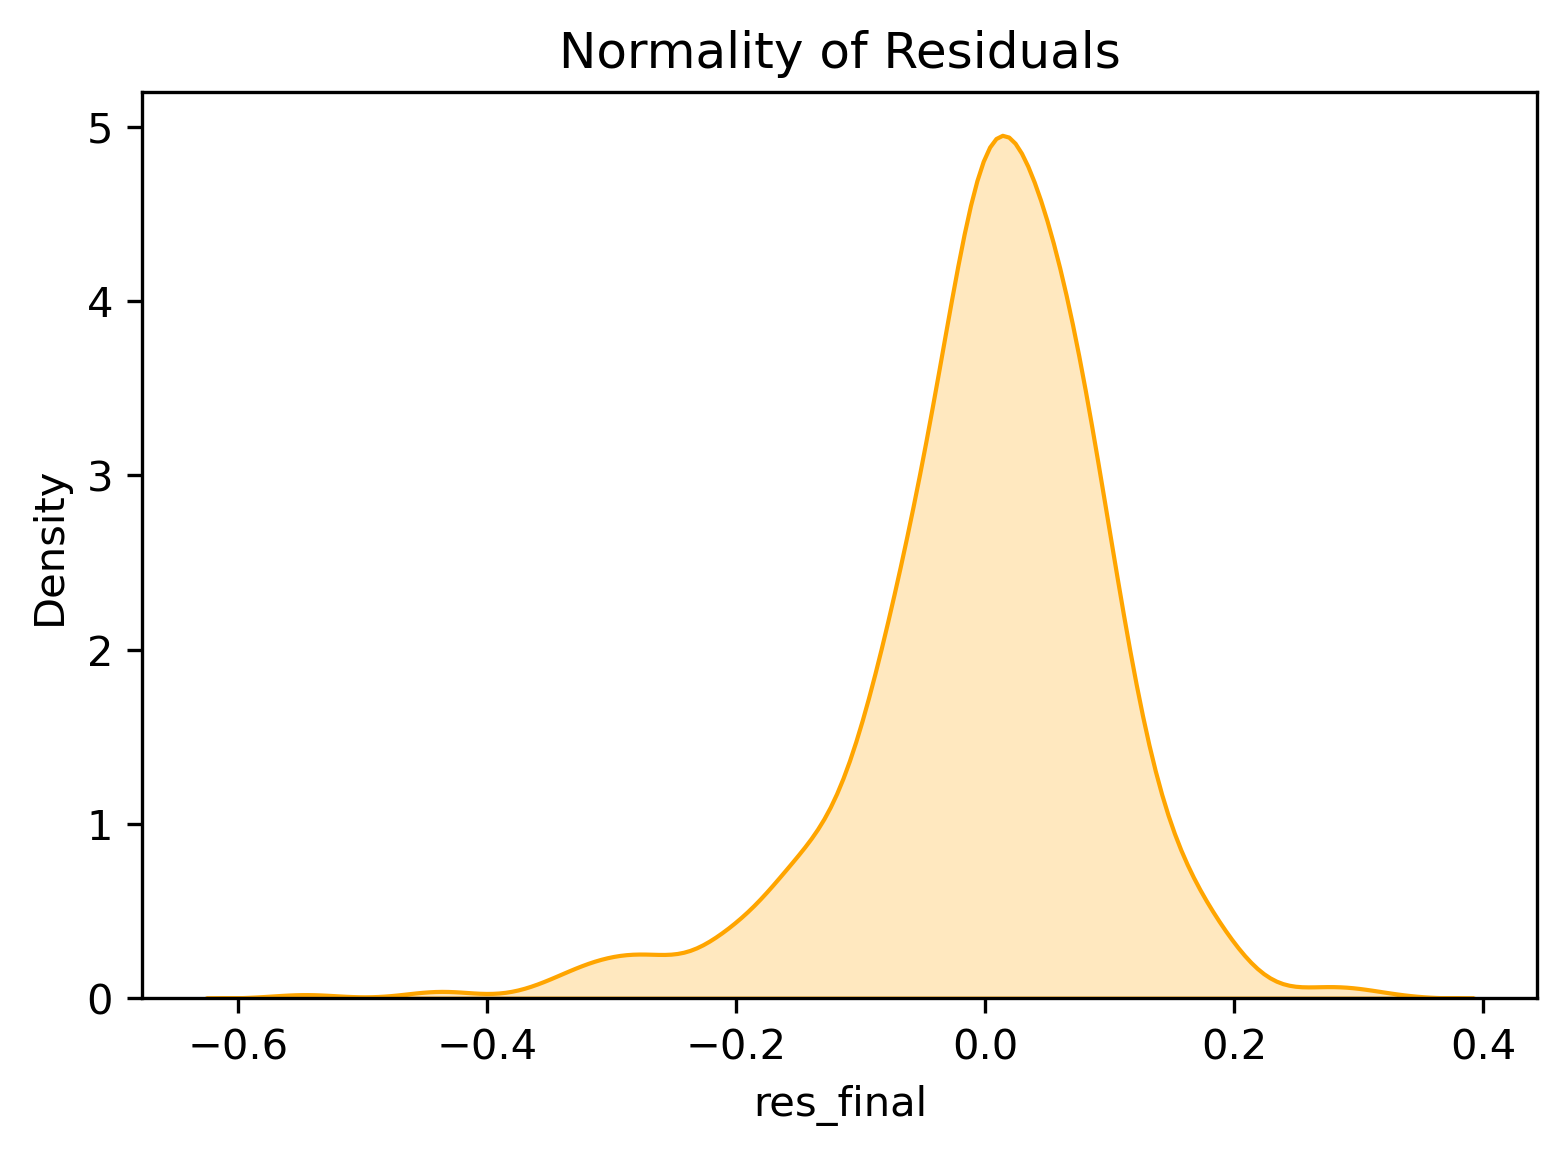

In [65]:
#Plotting the kdeplot for the residuals of the whole data set
res_final=y-y_hat
plt.figure(dpi=300)
plt.title('Normality of Residuals')
sns.kdeplot(res_final.cnt, shade=True, color='Orange')
plt.xlabel('res_final');

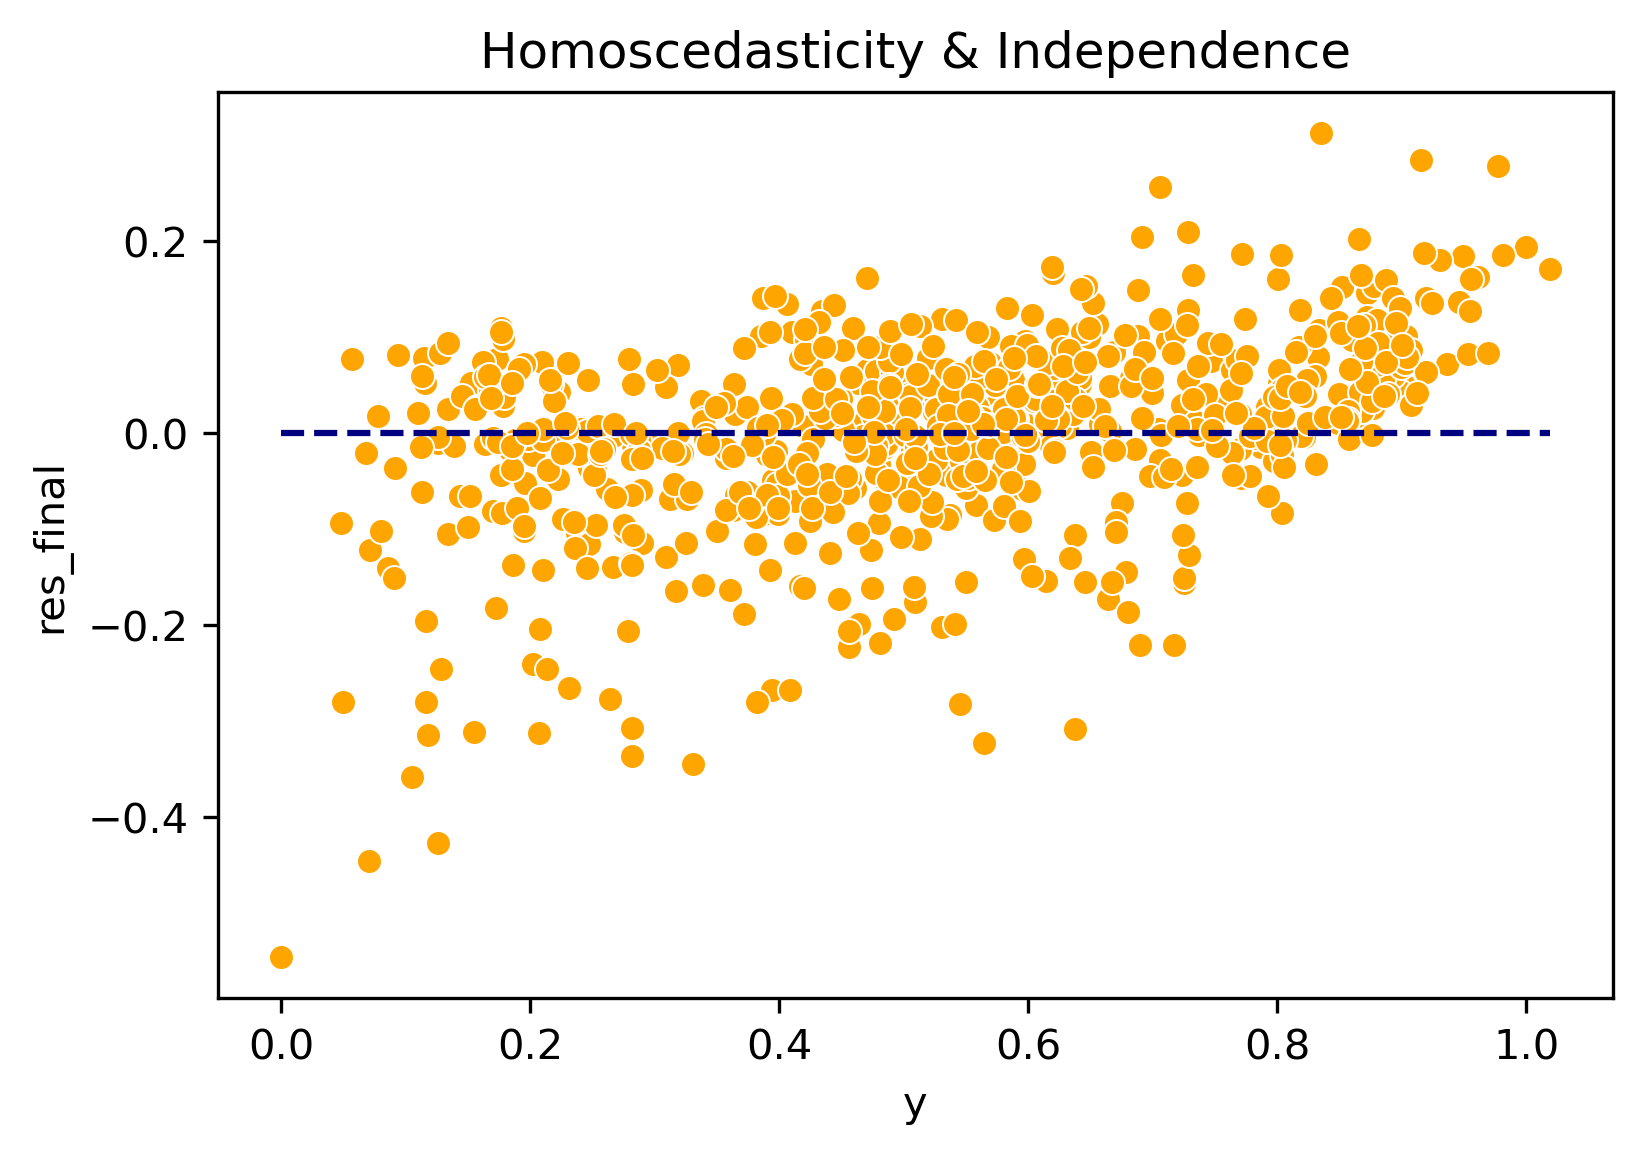

In [66]:
#Plotting the residuals against the actuals of the training set
plt.figure(dpi=300)
plt.title('Homoscedasticity & Independence')
sns.scatterplot(x=y.cnt,y=res_final.cnt, color='Orange')
plt.xlabel('y')
plt.ylabel('res_final')
sns.lineplot(x=y.cnt,y=0, color='navy', ls='--');

From the above plots, we clearly see that all the assumptions of linear regression, particularly the normality of residuals, homoscedasticity and independence of residuals are satisfied. Hence we can make inference using this linear model

# <font color='red'><u>final_model Model Performance:</u></font>
<font color='red'><b>Number of features=18</b></font><br/>
<font color='red'><b>r2_final=0.80</b></font>

Here we can clearly see that the <font color='navy'><b>r2_score<b></font> of the <font color='darkred'><b>whole data set<b></font> is <font color='darkred'><b>0.80<b></font>. Also from the residual analysis, we can infer that this <b>multiple linear regression model</b> <font color='darkgreen'><b>final_model<b></font> will generalize well to the unseen data. 
    
Let us list down all the <font color='navy'><b>features<b></font> used in our <font color='darkgreen'><b>final_model<b></font> and their respective <font color='navy'><b>weights<b></font> in decreasing order of their significance (in otherwords, the absolute values of <font color='navy'><b>weights<b></font>)

In [67]:
weights=list(zip(X.columns,final_model.coef_[0]))
weights.sort(key=lambda x:abs(x[-1]), reverse=True)
weights=pd.DataFrame(weights)
weights.columns=['Features','Weights']
weights

,Features,Weights
0,atemp,0.502256
1,hum,-0.280531
2,yr,0.236244
3,m10,0.223841
4,windspeed,-0.223479
5,m9,0.222159
6,m5,0.181496
7,m11,0.162070
8,m6,0.140132
9,m4,0.139034


Here we are finding the <font color='navy'><b>y-intercept<b></font> of our <font color='darkgreen'><b>final_model<b></font>

In [68]:
intercept=final_model.intercept_
intercept[0]

0.23260416626373293